In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

In [3]:
data = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/ds-regression-project-2-main/ds-regression-project-2-main/data/COVID19_Qc_RapportINSPQ_HistoVigie.csv")
df = data.copy()
df

,Date,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Deces_Cumulatif_CHCHSLD,Nb_Deces_Cumulatif_RPA,Nb_Deces_Cumulatif_DomInc,Nb_Deces_Cumulatif_Autre,Nb_Nvx_Deces_Total,Nb_Nvx_Deces_CHCHSLD,Nb_Nvx_Deces_RPA,Nb_Nvx_Deces_DomInc,Nb_Nvx_Deces_Autre
0,Date inconnue,0,0,0,0,0,0,0,100,10,20,65,5
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2023-01-02,1286460,794,17618,6816,3397,6639,766,2,0,0,2,0
1077,2023-01-03,1287392,932,17623,6818,3398,6641,766,5,2,1,2,0
1078,2023-01-04,1288487,1095,17628,6819,3399,6644,766,5,1,1,3,0
1079,2023-01-05,1289368,881,17637,6820,3400,6650,767,9,1,1,6,1


In [4]:
df.drop(0, inplace=True)
df.reset_index()
df = df[['Date','Nb_Nvx_Cas']]
df['index_col'] = df.reset_index().index
df = df.rename(columns={'Nb_Nvx_Cas': 'num_cases'})
df = df.rename(columns={'Date': 'date'})
df[df['date']=='2020-12-25']

,date,num_cases,index_col
338,2020-12-25,2323,337


In [70]:
truncated_df = df.loc[(df['index_col']>=307) & (df['index_col']<=366)]
truncated_df['index_col'] = truncated_df.reset_index().index
truncated_df['treated'] = truncated_df['index_col'].apply(lambda row: row>29)
truncated_df['treated'] = truncated_df['treated'].apply(lambda row: int(row))
truncated_df

,date,num_cases,index_col,treated
308,2020-11-25,1430,0,0
309,2020-11-26,1374,1,0
310,2020-11-27,1415,2,0
311,2020-11-28,1273,3,0
312,2020-11-29,1247,4,0
313,2020-11-30,1411,5,0
314,2020-12-01,1588,6,0
315,2020-12-02,1607,7,0
316,2020-12-03,1711,8,0
317,2020-12-04,1594,9,0


In [71]:
untreated_df = truncated_df[truncated_df['treated']==0]
print(f"The number of samples before the lockdown is {len(untreated_df)}.")
untreated_df

The number of samples before the lockdown is 30.


,date,num_cases,index_col,treated
308,2020-11-25,1430,0,0
309,2020-11-26,1374,1,0
310,2020-11-27,1415,2,0
311,2020-11-28,1273,3,0
312,2020-11-29,1247,4,0
313,2020-11-30,1411,5,0
314,2020-12-01,1588,6,0
315,2020-12-02,1607,7,0
316,2020-12-03,1711,8,0
317,2020-12-04,1594,9,0


In [72]:
treated_df = truncated_df[truncated_df['treated']==1]
# treated_df['new_index_col'] = treated_df.reset_index().index
print(f"The number of samples after the lockdown is {len(treated_df)}.")
treated_df

The number of samples after the lockdown is 30.


,date,num_cases,index_col,treated
338,2020-12-25,2323,30,1
339,2020-12-26,2060,31,1
340,2020-12-27,2240,32,1
341,2020-12-28,2149,33,1
342,2020-12-29,3105,34,1
343,2020-12-30,3009,35,1
344,2020-12-31,2556,36,1
345,2021-01-01,2430,37,1
346,2021-01-02,2289,38,1
347,2021-01-03,2343,39,1


### Linear regression for  pre-lockdown cases

In [73]:
X = untreated_df['index_col']
X = sm.add_constant(X)
y = untreated_df['num_cases']
est = sm.OLS(y,X).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     177.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.18e-13
Time:                        16:08:32   Log-Likelihood:                -185.35
No. Observations:                  30   AIC:                             374.7
Df Residuals:                      28   BIC:                             377.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1292.1892     43.016     30.040      0.000    1204.075    1380.303
index_col     33.9778      2.547     13.339      0.000      28.760      39.196
==============================================================================
Omnibus:                        3.935   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                2.066
Skew:                          -0.370   Prob(JB):                        0.356
Kurtosis:                       1.948   Cond. No.                         33.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

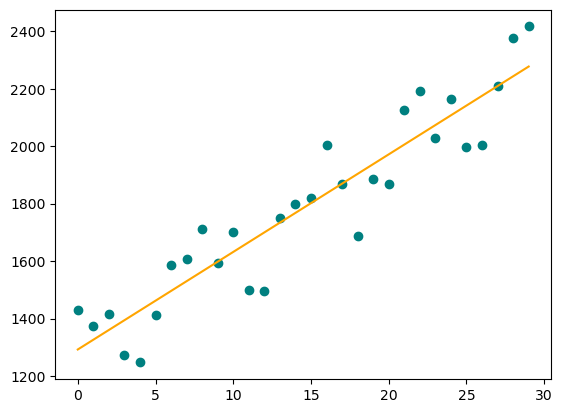

In [74]:
Xfit = untreated_df['index_col']
Xfit = sm.add_constant(Xfit)
yfit = est.predict(Xfit)
Xfit = np.squeeze(np.asarray(Xfit))
X = np.squeeze(np.asarray(X))
plt.scatter(X[:,1],y,color='teal')
plt.plot(Xfit[:,1],yfit,c='orange')
plt.show()

### Polynomial regression for  pre-lockdown cases

In [75]:
X1 = untreated_df['index_col']
X1 = sm.add_constant(X1)
X1 = np.squeeze(np.asarray(X1))
X1 = np.concatenate([X1, np.square(X1[:,1]).reshape(30,1)],axis=1)
y1 = untreated_df['num_cases']
est = sm.OLS(y1,X1).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     89.56
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.21e-12
Time:                        16:08:37   Log-Likelihood:                -184.79
No. Observations:                  30   AIC:                             375.6
Df Residuals:                      27   BIC:                             379.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1337.3774     61.937     21.593      0.000    1210.294    1464.461
x1            24.2946      9.887      2.457      0.021       4.008      44.581
x2             0.3339      0.329      1.014      0.320      -0.342       1.010
==============================================================================
Omnibus:                        3.284   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                1.866
Skew:                          -0.350   Prob(JB):                        0.393
Kurtosis:                       1.998   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

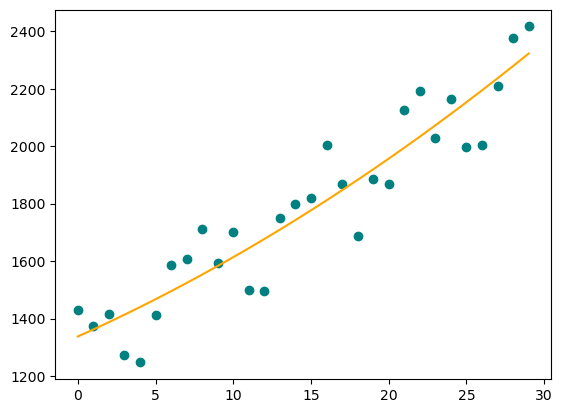

In [77]:
Xfit1 = untreated_df['index_col']
Xfit1 = sm.add_constant(Xfit1)
Xfit1 = np.squeeze(np.asarray(Xfit1))
Xfit1 = np.concatenate([Xfit1, np.square(Xfit1[:,1]).reshape(30,1)],axis=1)
yfit1 = est.predict(Xfit1)
X1 = np.squeeze(np.asarray(X1))
plt.scatter(X1[:,1],y1,color='teal')
plt.plot(Xfit1[:,1],yfit1,c='orange')
plt.show()

### Linear regression for  post-lockdown cases

In [78]:
X = treated_df['index_col']
X = sm.add_constant(X)
y = treated_df['num_cases']
est = sm.OLS(y,X).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     36.95
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.48e-06
Time:                        16:08:41   Log-Likelihood:                -214.34
No. Observations:                  30   AIC:                             432.7
Df Residuals:                      28   BIC:                             435.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3950.6768    303.505     13.017      0.000    3328.975    4572.379
index_col    -40.6961      6.695     -6.079      0.000     -54.410     -26.982
==============================================================================
Omnibus:                        0.233   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.432
Skew:                           0.046   Prob(JB):                        0.806
Kurtosis:                       2.419   Cond. No.                         238.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

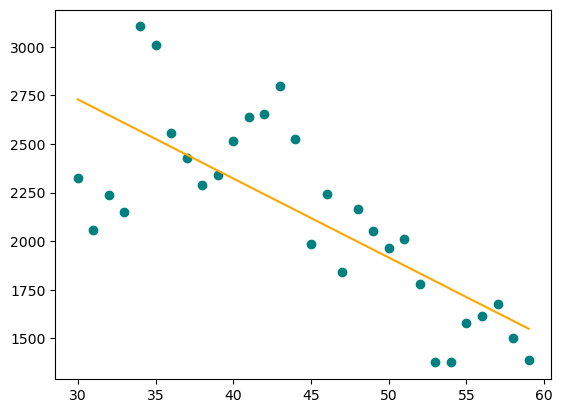

In [79]:
Xfit = treated_df['index_col']
Xfit = sm.add_constant(Xfit)
yfit = est.predict(Xfit)
Xfit = np.squeeze(np.asarray(Xfit))
X = np.squeeze(np.asarray(X))
plt.scatter(X[:,1],y,color='teal')
plt.plot(Xfit[:,1],yfit,c='orange')
plt.show()

### Polynomial regression for  post-lockdown cases

In [80]:
X2 = treated_df['index_col']
X2 = sm.add_constant(X2)
X2 = np.squeeze(np.asarray(X2))
X2 = np.concatenate([X2, np.square(X2[:,1]).reshape(30,1)],axis=1)
y2 = treated_df['num_cases']
est = sm.OLS(y2,X2).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     30.78
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.08e-07
Time:                        16:08:46   Log-Likelihood:                -209.14
No. Observations:                  30   AIC:                             424.3
Df Residuals:                      27   BIC:                             428.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -775.2928   1437.096     -0.539      0.594   -3723.971    2173.385
x1           180.0586     66.270      2.717      0.011      44.085     316.033
x2            -2.4804      0.742     -3.344      0.002      -4.002      -0.958
==============================================================================
Omnibus:                        1.236   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                0.935
Skew:                           0.423   Prob(JB):                        0.627
Kurtosis:                       2.820   Cond. No.                     6.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

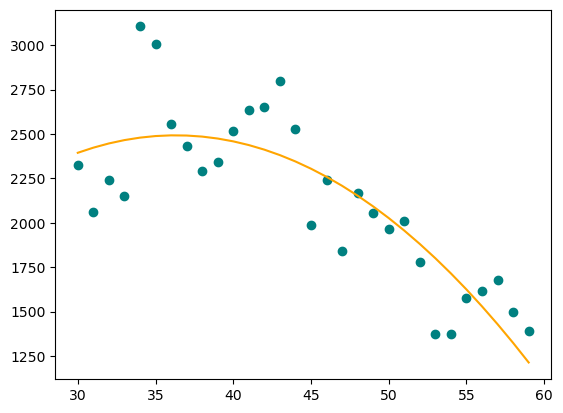

In [81]:
Xfit2 = treated_df['index_col']
Xfit2 = sm.add_constant(Xfit2)
Xfit2 = np.squeeze(np.asarray(Xfit2))
Xfit2 = np.concatenate([Xfit2, np.square(Xfit2[:,1]).reshape(30,1)],axis=1)
yfit2 = est.predict(Xfit2)
X2 = np.squeeze(np.asarray(X2))
plt.scatter(X2[:,1],y2,color='teal')
plt.plot(Xfit2[:,1],yfit2,c='orange')
plt.show()

### Measure of causal effect of lockdown

In [82]:
X = truncated_df['treated']
X = sm.add_constant(X)
y = truncated_df['num_cases']
est = sm.OLS(y,X).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     11.47
Date:                Tue, 10 Jan 2023   Prob (F-statistic):            0.00127
Time:                        16:08:51   Log-Likelihood:                -444.45
No. Observations:                  60   AIC:                             892.9
Df Residuals:                      58   BIC:                             897.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1784.8667     74.069     24.097      0.000    1636.602    1933.131
treated      354.8333    104.749      3.387      0.001     145.156     564.511
==============================================================================
Omnibus:                        0.441   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.600
Skew:                           0.110   Prob(JB):                        0.741
Kurtosis:                       2.563   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estimated effect of lockdown measures
#### The coefficient 454.60 represents the causal effect of the lockdown, with a p-value near 0 and under 0.05 of 2.08e-11.

In [83]:
pval = est.pvalues["treated"]
print("P-value:", pval)

P-value: 0.0012726060818297512


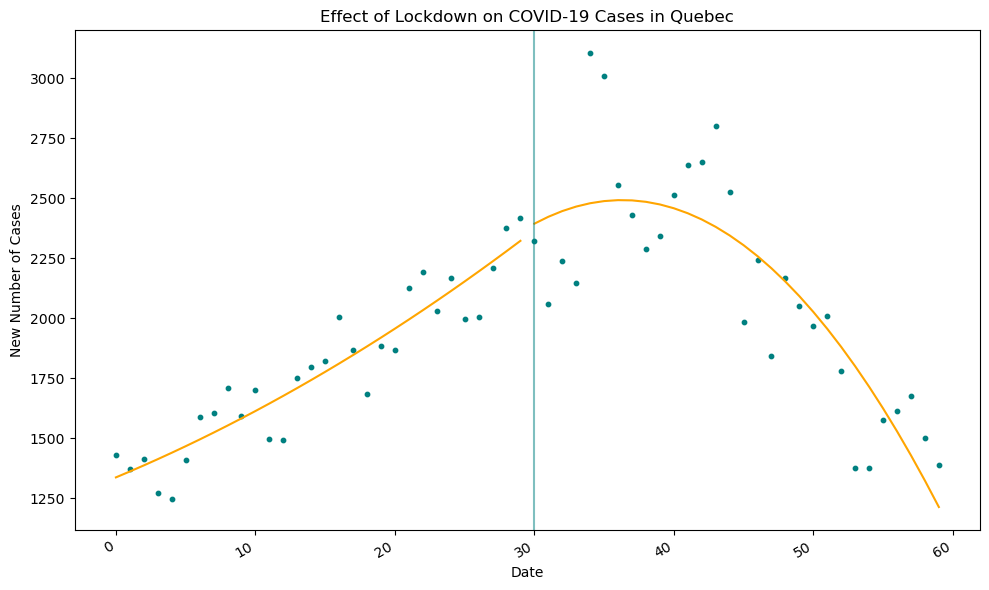

In [85]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X1[:,1],y1,color='teal',s=10)
ax.plot(Xfit1[:,1],yfit1,c='orange')
ax.scatter(X2[:,1],y2,color='teal',s=10)
ax.plot(Xfit2[:,1],yfit2,c='orange')
ax.set_title('Effect of Lockdown on COVID-19 Cases in Quebec')
ax.set_ylabel('New Number of Cases')
ax.set_xlabel('Date')
# ax.set_xticks([0,10,20,29,30,40,50,60])
# ax.set_xticklabels(['2020-02-29','2020-03-10','2020-03-19','2020-03-20','2020-03-19','2020-04-08'])
# ax.text(20.8,30,'Effect of lockdown: +454.60 cases',fontsize=10,horizontalalignment='left')
# ax.text(19.8,800,'Lockdown (cutoff)',fontsize=10,horizontalalignment='right',color='teal')
ax.axvline(30,0,3,color='teal',alpha=0.5)
fig.autofmt_xdate()
fig.tight_layout()